<a href="https://colab.research.google.com/github/emmaewade/COVID-Time-Series/blob/main/hkw_hmm_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install hmmlearn


##########owd data##############################

owd = pd.read_csv("/content/owid-covid-data.csv")
owd_us =  owd.loc[owd['location'] == "United States"]
cut_owd = owd_us.loc[:,['date', 'new_cases_smoothed', 'new_tests_smoothed', 'icu_patients', 'new_vaccinations_smoothed', ]]

cut_owd = cut_owd.dropna()

cut_2022 = cut_owd[cut_owd['date'].str.contains('2022-')]
cut_2022 = cut_2022.loc[:, ['new_cases_smoothed', 'icu_patients','new_tests_smoothed','new_vaccinations_smoothed']]
cut_2022_plot = cut_2022.to_numpy()

cut_2021 = cut_owd[cut_owd['date'].str.contains('2021-')]
cut_2021 = cut_2021.loc[:, ['new_cases_smoothed', 'icu_patients','new_tests_smoothed','new_vaccinations_smoothed']]
cut_2021_plot = cut_2021.to_numpy()

cut_july = cut_owd[cut_owd['date'].str.contains('2021-01-|2021-02-|2021-03-|2021-04-|2021-05-|2021-06-')]
cut_july = cut_july.loc[:, ['new_cases_smoothed', 'icu_patients', 'new_tests_smoothed', 'new_vaccinations_smoothed']]
#cut_july = cut_july.to_numpy()
#print(cut_july)
cut_aug = cut_owd[cut_owd['date'].str.contains('2021-07-|2021-08-|2021-09-|2021-10-|2021-11-|2021-12-|2022-01-|2022-02')]
cut_aug = cut_aug.loc[:, ['new_cases_smoothed','icu_patients','new_tests_smoothed','new_vaccinations_smoothed']]
cut_plot = cut_aug.to_numpy()

cut_all = cut_owd.loc[:, ['new_cases_smoothed','icu_patients','new_vaccinations_smoothed']]
cut_all = cut_all.to_numpy()

cases = cut_aug.loc[:, ['new_cases_smoothed']]
icu = cut_aug.loc[:, ['icu_patients']]
vax = cut_aug.loc[:, ['new_vaccinations_smoothed']]
tests = cut_aug.loc[:, ['new_tests_smoothed']]

cases_2022 = cut_2022.loc[:, ["new_cases_smoothed"]]
vax_2022 = cut_2022.loc[:, ["new_vaccinations_smoothed"]]
icu_2022 = cut_2022.loc[:, ["icu_patients"]]
tests_2022 = cut_2022.loc[:, ["new_tests_smoothed"]]

cases_2021 = cut_2021.loc[:, ["new_cases_smoothed"]]
vax_2021 = cut_2021.loc[:, ["new_vaccinations_smoothed"]]
icu_2021 = cut_2021.loc[:, ["icu_patients"]]
tests_2021 = cut_2021.loc[:, ["new_tests_smoothed"]]

test_cases_2021 = cut_july.loc[:, ["new_cases_smoothed"]]
test_vax_2021 = cut_july.loc[:, ["new_vaccinations_smoothed"]]
test_icu_2021 = cut_july.loc[:, ["icu_patients"]]
test_tests_2021 = cut_july.loc[:, ["new_tests_smoothed"]]

cat = np.concatenate([cases, icu, vax, tests])
lengths = [len(cases), len(icu), len(vax), len(tests)]

cat_2022 = np.concatenate([cases_2022, icu_2022, vax_2022, tests_2022])
lengths_2022 = [len(cases_2022), len(icu_2022), len(vax_2022), len(tests_2022)]

cat_2021 = np.concatenate([cases_2021, icu_2021, vax_2021, tests_2021])
lengths_2021 = [len(cases_2021), len(icu_2021), len(vax_2021), len(tests_2021)]

cat_train21 = np.concatenate([test_cases_2021, test_icu_2021, test_vax_2021, test_tests_2021])
lengths_train21 = [len(test_cases_2021), len(test_icu_2021), len(test_vax_2021), len(test_tests_2021)]







Converged: True	Score: -14385.009635716213
Converged: True	Score: -13154.2592816661
Converged: True	Score: -12794.153780749408
Converged: True	Score: -12699.349042406993
Converged: True	Score: -12561.4777826947
Converged: True	Score: -12049.64008085844
Converged: True	Score: -12192.731366969098
Converged: True	Score: -12143.452960579822
Converged: True	Score: -11889.025239897337
Converged: True	Score: -11762.0262828407
Converged: True	Score: -11703.32333975568
Converged: True	Score: -11854.05583260959
Converged: True	Score: -11909.724256230764
Converged: True	Score: -11681.915051370952
Converged: True	Score: -11789.694771507448
The best model had a score of -11681.915051370952 and 14 states


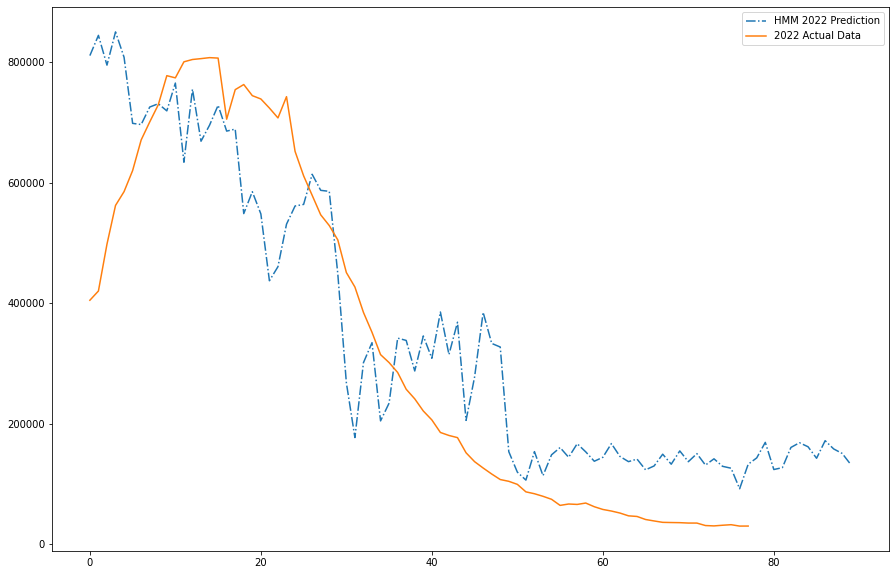

In [7]:
#Make 2022 Prediction based off training data from late 2021-early 2022
scores = list()
models = list()
states = list()


#test for best model
for n_component in range(1,16):
    # define our hidden Markov model
    from hmmlearn.hmm import GaussianHMM
    model = GaussianHMM(n_components=n_component, covariance_type = "full", n_iter = 1000)
    #fit using training data
    model.fit(cat, lengths)
    models.append(model)
    scores.append(model.score(cat))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')
          
 # get the best model
          
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

hidden_states = model.predict(cat_2022, lengths_2022)
st = model.decode(cat)

#take the best sample based on score
scores = list()
samples = list()
for i in range(1,101):
    X, Z = model.sample(90, currstate = hidden_states[-1])
    scores.append(model.score(X))
    samples.append(X)
    states.append(Z)

#save best samples along with their state
prediction = samples[np.argmax(scores)]
predicted_states = states[np.argmax(scores)]


#plot predicted vs real
figure = plt.figure(figsize=(15,10))
plt.plot(prediction, label = "HMM 2022 Prediction", linestyle = "-.")
#plt.plot(cut_2021[:, 0], label = "2021 Training Data", linestyle = "-")
plt.plot(cut_2022_plot[:,0], label = "2022 Actual Data", linestyle = "-")


plt.legend()
plt.show()

<function matplotlib.pyplot.show>

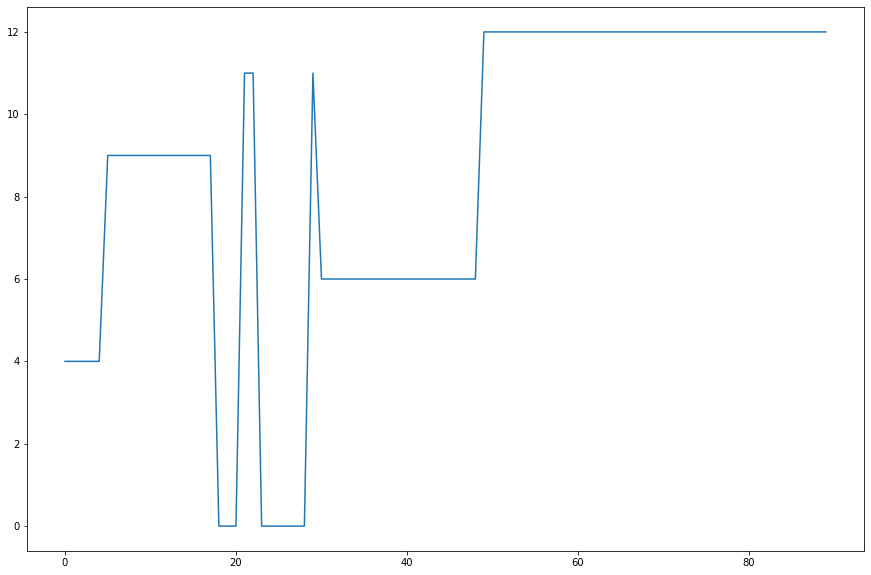

In [8]:
figure = plt.figure(figsize=(15,10))
plt.plot(predicted_states, label = "2022 States", linestyle = "-")
plt.show

Converged: True	Score: -14385.009635716213
Converged: True	Score: -13154.259285006445
Converged: True	Score: -12794.15378041579
Converged: True	Score: -12699.349362659372
Converged: True	Score: -12561.478009005448
Converged: True	Score: -12042.61258085405
Converged: True	Score: -12192.755794275496
Converged: True	Score: -12143.790671899485
Converged: True	Score: -11892.125809625722
Converged: True	Score: -11760.919746531761
Converged: True	Score: -11702.914646019713
Converged: True	Score: -11788.357843334385
Converged: True	Score: -12032.132853432478
Converged: True	Score: -11681.746252668383
Converged: True	Score: -11845.17920868203
Converged: True	Score: -11606.623324841588
Converged: True	Score: -11882.100290764942
Converged: True	Score: -11699.334607136589
Converged: True	Score: -11526.47975210521
Converged: True	Score: -11589.319437069245
Converged: True	Score: -11738.011844824887
Converged: True	Score: -11537.690993258964
Converged: True	Score: -11651.879958602594
Converged: True

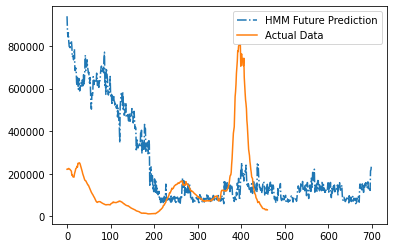

In [24]:
#predict far into the future 
scores = list()
models = list()

#test for best model, let it try more this time
for n_component in range(1,30):
     #define our hidden Markov model
    from hmmlearn.hmm import GaussianHMM
    m = GaussianHMM(n_components=n_component, covariance_type = "full", n_iter = 100)
    m.fit(cat, lengths)
    models.append(m)
    scores.append(m.score(cat))
    print(f'Converged: {m.monitor_.converged}'
          f'\tScore: {scores[-1]}')
          
          # get the best model
          
m = models[np.argmax(scores)]

n_states = m.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
     'states')
#print(m.decode(cat))
hidden_states = m.predict(cat, lengths)
t,g = m.decode(cat)

#print(g)
#print(t)
print(hidden_states)
#print(m.transmat_)
scores = list()
samples = list()
states = list()
for i in range(1,101):
  _, Z = m.sample(700)
  X, Z = m.sample(700, currstate=hidden_states[-1])
  scores.append(m.score(X))
  samples.append(X)
  states.append(Z)
#print(Z)
prediction = samples[np.argmax(scores)]
predicted_s = states[np.argmax(scores)]
#print(predicted_s)

plt.plot(prediction, label = "HMM Future Prediction", linestyle = "-.")
#plt.plot(cut_2021[:, 0], label = "2021 Training Data", linestyle = "-")
plt.plot(cut_all[:,0], label = "Actual Data", linestyle = "-")

plt.legend()
plt.show()